## Chemical Applications of Machine Learning (CHEM 4930/5610) - Spring 2026

### Assignment 2 - Deadline 2/3/2026
Points 10

#### General Comments
All figures and graph should have approriate labels on the two axis, and should include a legend with appropriate labels of the different plots.

The notebook should be return in working format. That is, I should be able to reset all the output and re-run all the cells and get the same results as you obtained.

**You should start by saving a copy of the notebook to your Google Drive so you preserve all changes.**

**Please add your name as a suffix to the filname**

**Student Name**: Deepa Ranabhat

**AI usage statement:**
Used ChatGPT basically for generating the python code and understand them how to implement them for the data analysis

### Task 1 - 10 points

In this task, we will consider the Bradley Melting Point Dataset, which is curated chemical dataset with melting points of around 3,000 chemical compounds, see [here](https://www.kaggle.com/datasets/aliffaagnur/melting-point-chemical-dataset/data).

This dataset is stored in a comma-separated values (csv) file, which is common format used to start data in text files. We can load this into a pandas DataFrame using the `load_csv` function.

In this dataset, we have the compounds names, SMILES strings, and the melting point in Celsius.

#### A)
Identify in the dataset the chemical compounds with the 5 lowest melting points and 5 highest melting points and visualize their 2D chemical structure using RDKit and the [mols2grid package](https://mols2grid.readthedocs.io/en/latest/), where you display the melting point values on the grid, see [here](https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/fundamentals/A_Whirlwind_Introduction_To_The_RDKit.ipynb#scrollTo=N3CR7rMF3sg7) for an example of the usage of mols2grid.

#### B)
Calculate the following properties for the molecules using RDKIt:
- The molecular weight
- The number of heavy atoms
- Number of hydrogen bond acceptors
- Number of hydrogen bond donors
- [Octanol-water partition coefficient - LogP](https://pubs-acs-org.libproxy.library.unt.edu/doi/10.1021/ci990307l)
- [Topological polar surface area (TPSA) descriptor](https://pubs-acs-org.libproxy.library.unt.edu/doi/abs/10.1021/jm000942e)
- Topological polar surface area (TPSA) descriptor, including S and P atoms, see [here](https://www.rdkit.org/docs/RDKit_Book.html#implementation-of-the-tpsa-descriptor)

Note: for some of the molecules, the TPSA descriptor will give a value of zero. When doing any analysis for the TPSA descriptor, you should ignore these values.

#### C)
Write out to a new csv file values of all the properties calculated in B) along with the compound names, SMILES strings, and the melting point in Celsius. Here, when writing this file, you should ignore any compounds where the SMILES conversion did not work correctly.

#### D)
Perform a linear regression analysis using scikit-learn where you look at the correlation of each of the properties calculated in B) with melting temperature. Here, each property should be considered individually.

To avoid outliers, filter out (i.e., remove) the compounds with the lowest 10% and the highest 10% melting temperature. Make a histogram that shows this filtering. Furthermore, for each property, filter out the compounds with lowest 10% and highest 10% values (again making a histogram that shows this filtering). Only consider the joint remaining compounds in your linear regression analysis for each property.

When performing the linear regression, employ a 70%/30% training/test split.

Calculate the coefficient of determination, $R^2$, for both the training dataset and the test dataset and report both.

You should make figure that shows the data along with the linear curve coming from the linear regression. In the figure, it should be clear which data points are in the training and test set (e.g., by having them in different colors). Include the $R^2$ values on the figure.

From your analysis, which of the properties correlates best with the melting temperature?

#### E)
For two of the properties from D) (e.g., the ones that correlate best with the melting point), perform [RANSAC](https://en.wikipedia.org/wiki/Random_sample_consensus) regression, which is method that takes outliers into account when performing linear regression and does not include them in the final modeling, see [here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html).

In the figure, it should be clear which data points are in inlier set and which are in the outlier set (e.g., by showing them in different colors).


In [1]:
# Bash script to download all the dataset. Don't worry if you don't understand it
%%bash

url="https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Assignment-2/"
dataset_filename="BradleyDoublePlusGoodMeltingPointDataset.csv"

rm -f ${dataset_filename}

wget ${url}/${dataset_filename} &> /dev/null

ls

BradleyDoublePlusGoodMeltingPointDataset.csv
sample_data


A)  Chemical compounds with the 5 lowest melting points and 5 highest melting points and visualize their 2D chemical structure using RDKit and the mols2grid package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("BradleyDoublePlusGoodMeltingPointDataset.csv")

In [4]:
#print (data_mp.keys)
print(list(data.keys()))

['key', 'name', 'smiles', 'mpC', 'csid', 'link', 'source', 'count', 'min', 'max', 'range']


In [5]:
data["mpC"]

,mpC
0,-161.51
1,-90.80
2,-135.80
3,94.80
4,-7.20
...,...
3036,240.00
3037,275.00
3038,176.00
3039,65.00


In [6]:
melting_point_C= data ["mpC"]
print (melting_point_C)

0      -161.51
1       -90.80
2      -135.80
3        94.80
4        -7.20
         ...  
3036    240.00
3037    275.00
3038    176.00
3039     65.00
3040    -34.00
Name: mpC, Length: 3041, dtype: float64


In [7]:
lowest_5_molecules = np.argpartition(melting_point_C,5)[:5]
print (lowest_5_molecules)

[375 102 303 345 821]


In [8]:
data[['name', 'smiles', 'mpC']].iloc[lowest_5_molecules]

,name,smiles,mpC
375,Propane,CCC,-188.00
102,Prop-1-ene,C=CC,-185.00
303,But-1-ene,C=CCC,-185.00
345,Tetrafluoromethane,FC(F)(F)F,-184.00
821,ethane,CC,-183.33


In [9]:
highest_5_molecules = np.argpartition(melting_point_C,-5)[-5:]
print (highest_5_molecules)

[2639 2952  482 1075 2384]


In [10]:
data[['name', 'smiles', 'mpC']].iloc[highest_5_molecules]

,name,smiles,mpC
2639,Diazoxide,Clc1ccc2NC(C)=NS(=O)(=O)c2c1,330.5
2952,isophthalic_acid,OC(=O)c1cccc(c1)C(=O)O,342.0
482,"2,4-dihydroxypteridine",c1cnc2c(n1)c(=O)[nH]c(=O)[nH]2,348.0
1075,"thiophene-2,5-dicarboxylic acid",c1cc(sc1C(=O)O)C(=O)O,358.0
2384,Coronene,C1=CC2=C3C4=C1C=CC5=C4C6=C(C=C5)C=CC7=C6C3=C(C...,438.0


In [11]:
# the %%capture command will surpress output to screen
%%capture
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !pip install rdkit mols2grid

In [12]:

import mols2grid


In [13]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
# we can also add information to the figures by using the subset variable
mols2grid.display(data,smiles_col='smiles',subset=['img','name','smiles','mpC'])

In [14]:
# by passing the dataframe, and giving the column with the SMILES string, we can
# plot all molecules
# we can also add information to the figures by using the subset variable
# Here we also format the string for the melting point to show the C.

def mp_str(x):
    return f'{x:.2f} C'

mols2grid.display(data.iloc[lowest_5_molecules],smiles_col='smiles',subset=['img','name','mpC'], transform={"mpC": mp_str})

In [15]:

def mp_str(x):
    return f'{x:.2f} C'

mols2grid.display(data.iloc[highest_5_molecules],smiles_col='smiles',subset=['img','name','mpC'], transform={"mpC": mp_str})

B)
Calculate the following properties for the molecules using RDKIt:

The molecular weight
The number of heavy atoms
Number of hydrogen bond acceptors
Number of hydrogen bond donors
Octanol-water partition coefficient - LogP
Topological polar surface area (TPSA) descriptor
Topological polar surface area (TPSA) descriptor, including S and P atoms

In [16]:
from rdkit.Chem import Descriptors, rdMolDescriptors


In [17]:
print("Descriptors.__")
for des in Descriptors._descList: print("-",des[0])

Descriptors.__
- MaxAbsEStateIndex
- MaxEStateIndex
- MinAbsEStateIndex
- MinEStateIndex
- qed
- SPS
- MolWt
- HeavyAtomMolWt
- ExactMolWt
- NumValenceElectrons
- NumRadicalElectrons
- MaxPartialCharge
- MinPartialCharge
- MaxAbsPartialCharge
- MinAbsPartialCharge
- FpDensityMorgan1
- FpDensityMorgan2
- FpDensityMorgan3
- BCUT2D_MWHI
- BCUT2D_MWLOW
- BCUT2D_CHGHI
- BCUT2D_CHGLO
- BCUT2D_LOGPHI
- BCUT2D_LOGPLOW
- BCUT2D_MRHI
- BCUT2D_MRLOW
- AvgIpc
- BalabanJ
- BertzCT
- Chi0
- Chi0n
- Chi0v
- Chi1
- Chi1n
- Chi1v
- Chi2n
- Chi2v
- Chi3n
- Chi3v
- Chi4n
- Chi4v
- HallKierAlpha
- Ipc
- Kappa1
- Kappa2
- Kappa3
- LabuteASA
- PEOE_VSA1
- PEOE_VSA10
- PEOE_VSA11
- PEOE_VSA12
- PEOE_VSA13
- PEOE_VSA14
- PEOE_VSA2
- PEOE_VSA3
- PEOE_VSA4
- PEOE_VSA5
- PEOE_VSA6
- PEOE_VSA7
- PEOE_VSA8
- PEOE_VSA9
- SMR_VSA1
- SMR_VSA10
- SMR_VSA2
- SMR_VSA3
- SMR_VSA4
- SMR_VSA5
- SMR_VSA6
- SMR_VSA7
- SMR_VSA8
- SMR_VSA9
- SlogP_VSA1
- SlogP_VSA10
- SlogP_VSA11
- SlogP_VSA12
- SlogP_VSA2
- SlogP_VSA3
- SlogP

In [18]:
# This function calculates the MolWt', 'HeavyAtomCount', 'LogP', 'HBA', 'HBD', 'TPSA', 'TPSA_S_P'
# from a SMILES string using RDKit. If the SMILES is invalid,
# it returns NaN instead of causing an error.

from rdkit import Chem
from rdkit.Chem import Descriptors

def molecular_weight(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return Descriptors.MolWt(mol)
  else:
    return np.nan

def Heavy_atom_count(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return Descriptors.HeavyAtomCount(mol)
  else:
    return np.nan

def mol_logP(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return Descriptors.MolLogP(mol)
  else:
    return np.nan

def hba (smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return rdMolDescriptors.CalcNumHBA(mol)
  else:
    return np.nan

def hbd (smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return rdMolDescriptors.CalcNumHBD(mol)
  else:
    return np.nan

def tpsa (smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return rdMolDescriptors.CalcTPSA(mol)
  else:
    return np.nan


def tpsa_sp(smi):
  mol = Chem.MolFromSmiles(smi)
  if mol is not None:
    return rdMolDescriptors.CalcTPSA(mol, includeSandP= True)
  else:
    return np.nan




In [19]:
# here we calculate some property and add that to the dataframe
data['MolWt'] = [molecular_weight(smi) for smi in data['smiles']]
data['HeavyAtomCount'] = [Heavy_atom_count(smi) for smi in data['smiles']]
data['LogP'] = [mol_logP(smi) for smi in data['smiles']]
data['HBA'] = [hba(smi) for smi in data['smiles']]
data['HBD'] = [hbd(smi) for smi in data['smiles']]
data['TPSA'] = [tpsa(smi) for smi in data['smiles']]
data['TPSA_S_P'] = [tpsa_sp(smi)for smi in data['smiles']]

[22:14:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[22:14:56] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 24 25 26 27 28 31 32 33 34
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 12 13 14 15 16
[22:14:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[22:14:57] Can't kekulize mol.  Unkekuliz

In [20]:
data.describe()

,key,mpC,csid,count,min,max,range,MolWt,HeavyAtomCount,LogP,HBA,HBD,TPSA,TPSA_S_P
count,3041.000000,3041.000000,3.041000e+03,3041.000000,3041.000000,3041.000000,3041.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000
mean,10771.570865,62.848159,2.027796e+06,2.798422,62.229536,63.879092,1.649556,180.528716,11.896860,2.241707,1.783471,0.678678,33.417812,35.766912
std,6875.518120,96.007422,5.474893e+06,1.275456,95.877685,96.229485,1.293567,80.114001,5.494701,1.712903,1.484173,0.861752,27.943325,29.244735
min,10.000000,-188.000000,1.800000e+01,2.000000,-188.000000,-187.600000,0.010000,16.043000,1.000000,-5.395600,0.000000,0.000000,0.000000,0.000000
25%,5148.000000,5.000000,7.634000e+03,2.000000,4.800000,5.600000,0.500000,129.247000,8.000000,1.268800,1.000000,0.000000,12.890000,17.070000
50%,13103.000000,64.000000,1.282900e+04,2.000000,62.750000,65.000000,1.000000,166.180000,11.000000,2.091800,2.000000,0.000000,29.460000,34.140000
75%,15269.000000,129.500000,6.675900e+04,3.000000,129.000000,130.800000,2.500000,214.648000,14.000000,3.026700,3.000000,1.000000,47.580000,51.480000
max,28644.000000,438.000000,2.142902e+07,16.000000,437.300000,440.000000,5.000000,959.171000,62.000000,17.410400,14.000000,8.000000,221.290000,237.750000


In [21]:
# Drop rows where any key molecular descriptor is missing (NaN).
# This ensures all molecules used in regression/plots have complete data.

data_ignore_nan = data.dropna(
    subset=['MolWt', 'HeavyAtomCount', 'LogP', 'HBA', 'HBD', 'TPSA', 'TPSA_S_P']
)


In [22]:
data_ignore_nan

,key,name,smiles,mpC,csid,link,source,count,min,max,range,MolWt,HeavyAtomCount,LogP,HBA,HBD,TPSA,TPSA_S_P
0,27956,cyclobutylmethane,C1(CCC1)C,-161.51,11232,http://pubs.acs.org/doi/abs/10.1021/ja01142a048,Lemaire HP; Livingston RL Journal of the Ameri...,2,-161.51,-161.5,0.01,70.135,5.0,1.80640,0.0,0.0,0.00,0.00
1,16005,Nitrogen oxide,[O-][N+]#N,-90.80,923,http://msds.chem.ox.ac.uk/,academic website,2,-90.81,-90.8,0.01,44.013,3.0,0.33728,2.0,0.0,51.21,51.21
2,16127,Sulfuryl difluoride,FS(F)(=O)=O,-135.80,16647,http://msds.chem.ox.ac.uk/,academic website,2,-135.82,-135.8,0.02,102.061,5.0,0.17020,2.0,0.0,34.14,42.52
3,17138,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.80,3002,http://dx.doi.org/10.1021/ci700307p,Hughes LD; Palmer DS; Nigsch F and Mitchell JB...,2,94.75,94.8,0.05,339.483,25.0,3.36190,3.0,1.0,59.22,59.22
4,15628,Bromine,BrBr,-7.20,22817,http://msds.chem.ox.ac.uk/,academic website,2,-7.25,-7.2,0.05,159.808,2.0,1.69120,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3036,27698,4-Nitrobenzoic acid,C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],240.00,5882,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,6,237.00,242.0,5.00,167.120,12.0,1.29300,3.0,1.0,80.44,80.44
3037,28584,Thalidomide,C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O,275.00,5233,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,7,270.00,275.0,5.00,258.233,19.0,0.08780,4.0,1.0,83.55,83.55
3038,28068,Estradiol,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3...,176.00,5554,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,7,173.00,178.0,5.00,272.388,20.0,3.60920,2.0,2.0,40.46,40.46
3039,27580,"2,4,6-Trichlorophenol",C1=C(C=C(C(=C1Cl)O)Cl)Cl,65.00,21106172,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,9,65.00,70.0,5.00,197.448,10.0,3.35240,1.0,1.0,20.23,20.23


C) New csv file values of all the properties calculated in B) along with the compound names, SMILES strings, and the melting point in Celsius.

In [23]:
data_ignore_nan.to_csv("test_with_descriptors.csv", index=False)


In [24]:
!head test_with_descriptors.csv

key,name,smiles,mpC,csid,link,source,count,min,max,range,MolWt,HeavyAtomCount,LogP,HBA,HBD,TPSA,TPSA_S_P
27956,cyclobutylmethane,C1(CCC1)C,-161.51,11232,http://pubs.acs.org/doi/abs/10.1021/ja01142a048,Lemaire HP; Livingston RL Journal of the American Chemical Society; 74(22); 5732-5736 (1952),2,-161.51,-161.5,0.0099999999999909,70.135,5.0,1.8064,0.0,0.0,0.0,0.0
16005,Nitrogen oxide,[O-][N+]#N,-90.8,923,http://msds.chem.ox.ac.uk/,academic website,2,-90.81,-90.8,0.0100000000000051,44.013,3.0,0.33728,2.0,0.0,51.209999999999994,51.209999999999994
16127,Sulfuryl difluoride,FS(F)(=O)=O,-135.8,16647,http://msds.chem.ox.ac.uk/,academic website,2,-135.82,-135.8,0.0199999999999818,102.06099999999999,5.0,0.17020000000000013,2.0,0.0,34.14,42.52
17138,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.8,3002,http://dx.doi.org/10.1021/ci700307p,Hughes LD; Palmer DS; Nigsch F and Mitchell JBO. 2008 Why are some properties more difficult to predict than others? A study of QSPR models of solubi

In [25]:
data_ignore_nan[[ 'key', 'name', 'MolWt', 'HeavyAtomCount', 'LogP', 'HBA', 'HBD', 'TPSA', 'TPSA_S_P'] ].to_csv("test-subset.csv",index=False)

In [26]:
!head test-subset.csv


key,name,MolWt,HeavyAtomCount,LogP,HBA,HBD,TPSA,TPSA_S_P
27956,cyclobutylmethane,70.135,5.0,1.8064,0.0,0.0,0.0,0.0
16005,Nitrogen oxide,44.013,3.0,0.33728,2.0,0.0,51.209999999999994,51.209999999999994
16127,Sulfuryl difluoride,102.06099999999999,5.0,0.17020000000000013,2.0,0.0,34.14,42.52
17138,disopyramide,339.4830000000002,25.0,3.361900000000001,3.0,1.0,59.220000000000006,59.220000000000006
15628,Bromine,159.808,2.0,1.6912,0.0,0.0,0.0,0.0
16624,Lomefloxacin,351.3530000000001,25.0,1.7958999999999998,5.0,2.0,74.57,74.57
15962,"N,N-Dimethylmethanamine",59.111999999999995,4.0,0.17779999999999996,1.0,0.0,3.24,3.24
16135,Tetrachloromethane,153.823,5.0,2.5529,0.0,0.0,0.0,0.0
15862,Iodine,253.808,2.0,1.7714,0.0,0.0,0.0,0.0


D)  Linear regression analysis using scikit-learn

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data_clean=pd.read_csv ("test_with_descriptors.csv")

In [29]:
print(list(data.keys()))

['key', 'name', 'smiles', 'mpC', 'csid', 'link', 'source', 'count', 'min', 'max', 'range', 'MolWt', 'HeavyAtomCount', 'LogP', 'HBA', 'HBD', 'TPSA', 'TPSA_S_P']


In [30]:
data_clean

,key,name,smiles,mpC,csid,link,source,count,min,max,range,MolWt,HeavyAtomCount,LogP,HBA,HBD,TPSA,TPSA_S_P
0,27956,cyclobutylmethane,C1(CCC1)C,-161.51,11232,http://pubs.acs.org/doi/abs/10.1021/ja01142a048,Lemaire HP; Livingston RL Journal of the Ameri...,2,-161.51,-161.5,0.01,70.135,5.0,1.80640,0.0,0.0,0.00,0.00
1,16005,Nitrogen oxide,[O-][N+]#N,-90.80,923,http://msds.chem.ox.ac.uk/,academic website,2,-90.81,-90.8,0.01,44.013,3.0,0.33728,2.0,0.0,51.21,51.21
2,16127,Sulfuryl difluoride,FS(F)(=O)=O,-135.80,16647,http://msds.chem.ox.ac.uk/,academic website,2,-135.82,-135.8,0.02,102.061,5.0,0.17020,2.0,0.0,34.14,42.52
3,17138,disopyramide,CC(C)N(CCC(c1ccccn1)(c2ccccc2)C(N)=O)C(C)C,94.80,3002,http://dx.doi.org/10.1021/ci700307p,Hughes LD; Palmer DS; Nigsch F and Mitchell JB...,2,94.75,94.8,0.05,339.483,25.0,3.36190,3.0,1.0,59.22,59.22
4,15628,Bromine,BrBr,-7.20,22817,http://msds.chem.ox.ac.uk/,academic website,2,-7.25,-7.2,0.05,159.808,2.0,1.69120,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,27698,4-Nitrobenzoic acid,C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],240.00,5882,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,6,237.00,242.0,5.00,167.120,12.0,1.29300,3.0,1.0,80.44,80.44
3021,28584,Thalidomide,C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O,275.00,5233,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,7,270.00,275.0,5.00,258.233,19.0,0.08780,4.0,1.0,83.55,83.55
3022,28068,Estradiol,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3...,176.00,5554,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,7,173.00,178.0,5.00,272.388,20.0,3.60920,2.0,2.0,40.46,40.46
3023,27580,"2,4,6-Trichlorophenol",C1=C(C=C(C(=C1Cl)O)Cl)Cl,65.00,21106172,http://dx.doi.org/10.1016/j.chemosphere.2013.1...,Abraham M.H. and Acree Jr. W.E. The solubility...,9,65.00,70.0,5.00,197.448,10.0,3.35240,1.0,1.0,20.23,20.23


Melting Point

In [31]:
mp_values = data_clean["mpC"].values

In [32]:
# here we use the np.percentile function to find 10-th percentile and 90-th percentile of the dataset

values_percentile_10 = np.percentile(mp_values,10)
values_percentile_90 = np.percentile(mp_values,90)


print(values_percentile_10)
print(values_percentile_90)

-77.59999999999997
182.0


In [33]:
 #we now create a numpy logical mask to select the elements that are
# within 10% of 90% of the data (that is excluding the lowest 10% and
# highest 10% values of the data)
#
# (values > values_percentile_10) selects values that are higher than values_percentile_10
# (values < values_percentile_90) selects values that are lower than values_percentile_90
# the "&" is a boolean AND operator to select elements that fulfil both.
mask_10_to_90 = (mp_values > values_percentile_10) & (mp_values < values_percentile_90)

values_filtered = mp_values[mask_10_to_90]
# the "~" is a boolean NOT operator
values_filtered_out = mp_values[~mask_10_to_90]

print("values.size:",mp_values.size)
print("values_filtered.size",values_filtered.size)
print("values_filtered_out",values_filtered_out.size)

values.size: 3025
values_filtered.size 2418
values_filtered_out 607


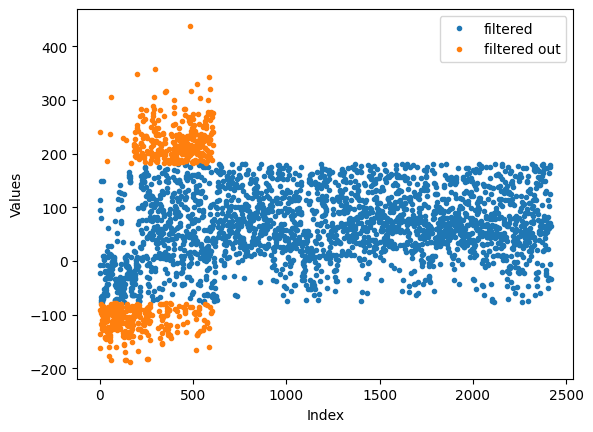

In [34]:
# plot the data, this will not look correctly as we only
# pass the values to the plot function so that the
# x-axis is in the index of the element
plt.plot(values_filtered,'.',label="filtered")
plt.plot(values_filtered_out,'.',label="filtered out")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()

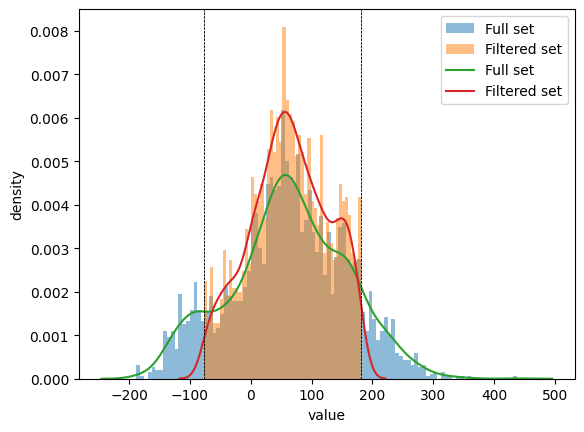

In [35]:
# make plots that shows the filtering

plt.hist(mp_values,bins=100,label="Full set",density=True, alpha=0.5)
plt.hist(values_filtered,bins=50,label="Filtered set",density=True, alpha=0.5)
plt.xlabel("value")
plt.ylabel("frequency")
# This is to plot vertical lines for the boundary at 10% and 90%
# using axvline. Here we will need to use the plt.gca() to get the
# axis object for the plot
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
#plt.show()
plt.legend()

# note that the KDE plot will "leak" outside the boundry
# lines as the KDE employs finite width Gaussian kernels
sns.kdeplot(mp_values,label="Full set")
sns.kdeplot(values_filtered,label="Filtered set")
plt.xlabel("value")
plt.ylabel("density")
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.legend()
#plt.show()

MolWt

In [36]:
molwt_values = data_clean["MolWt"].values

In [37]:
values_percentile_10 = np.percentile(molwt_values,10)
values_percentile_90 = np.percentile(molwt_values,90)

print(values_percentile_10)
print(values_percentile_90)

98.18899999999998
280.2922


In [38]:
mask_10_to_90 = (molwt_values > values_percentile_10) & (molwt_values < values_percentile_90)

values_filtered = molwt_values[mask_10_to_90]
# the "~" is a boolean NOT operator
values_filtered_out = molwt_values[~mask_10_to_90]

#For regression (molwt + mpC together)
data_molwt_filtered = data_clean[mask_10_to_90]

print("values.size:",molwt_values.size)
print("values_filtered.size",values_filtered.size)
print("values_filtered_out",values_filtered_out.size)

values.size: 3025
values_filtered.size 2419
values_filtered_out 606


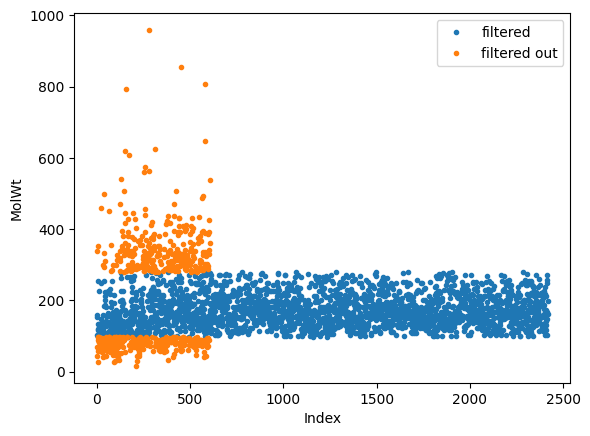

In [39]:
plt.plot(values_filtered,'.',label="filtered")
plt.plot(values_filtered_out,'.',label="filtered out")
plt.xlabel("Index")
plt.ylabel("MolWt")
plt.legend()

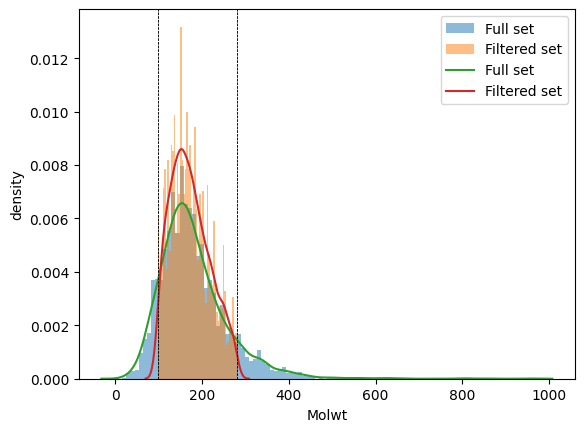

In [40]:
# make plots that shows the filtering

plt.hist(molwt_values,bins=100,label="Full set",density=True, alpha=0.5)
plt.hist(values_filtered,bins=50,label="Filtered set",density=True, alpha=0.5)
plt.xlabel("Molwt")
plt.ylabel("frequency")
# This is to plot vertical lines for the boundary at 10% and 90%
# using axvline. Here we will need to use the plt.gca() to get the
# axis object for the plot
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
#plt.show()
plt.legend()

# note that the KDE plot will "leak" outside the boundry
# lines as the KDE employs finite width Gaussian kernels
sns.kdeplot(molwt_values,label="Full set")
sns.kdeplot(values_filtered,label="Filtered set")
plt.xlabel("Molwt")
plt.ylabel("density")
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.legend()
#plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

MolWt → R² train: 0.141, R² test: 0.157


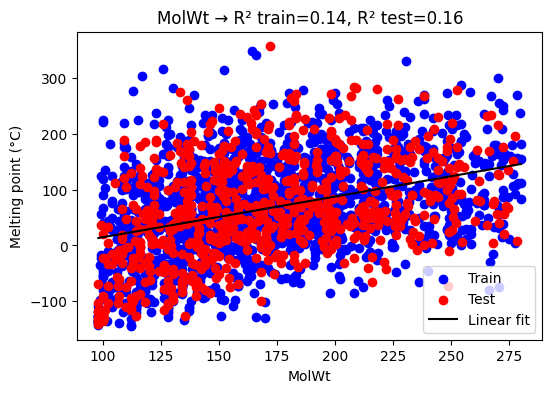

In [42]:
# Linear regression
X = data_molwt_filtered[['MolWt']].values
y = data_molwt_filtered['mpC'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print(f"MolWt → R² train: {r2_train:.3f}, R² test: {r2_test:.3f}")

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(X_line, model.predict(X_line), color='black', label='Linear fit')
plt.xlabel('MolWt')
plt.ylabel('Melting point (°C)')
plt.title(f'MolWt → R² train={r2_train:.2f}, R² test={r2_test:.2f}')
plt.legend()

Heavy Atoms Count

In [43]:
heavyatom_values = data_clean["HeavyAtomCount"].values

6.0
19.0
values.size: 3025
values_filtered.size 2360
values_filtered_out 665


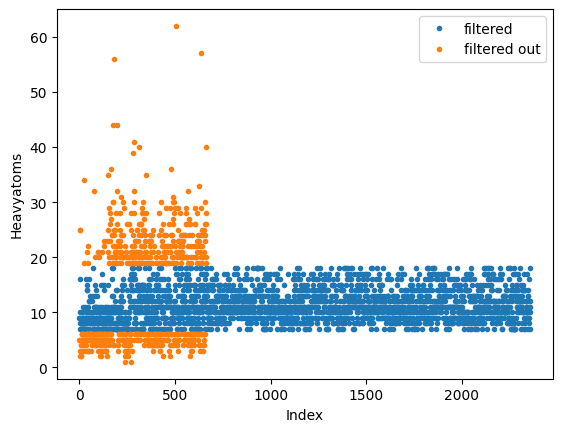

In [44]:
values_percentile_10 = np.percentile(heavyatom_values,10)
values_percentile_90 = np.percentile(heavyatom_values,90)

print(values_percentile_10)
print(values_percentile_90)

mask_10_to_90 = (heavyatom_values > values_percentile_10) & (heavyatom_values < values_percentile_90)

values_filtered = heavyatom_values[mask_10_to_90]
# the "~" is a boolean NOT operator
values_filtered_out = heavyatom_values[~mask_10_to_90]

#For regression (molwt + mpC together)
data_heavyatoms_filtered = data_clean[mask_10_to_90]

print("values.size:",heavyatom_values.size)
print("values_filtered.size",values_filtered.size)
print("values_filtered_out",values_filtered_out.size)

plt.plot(values_filtered,'.',label="filtered")
plt.plot(values_filtered_out,'.',label="filtered out")
plt.xlabel("Index")
plt.ylabel("Heavyatoms")
plt.legend()

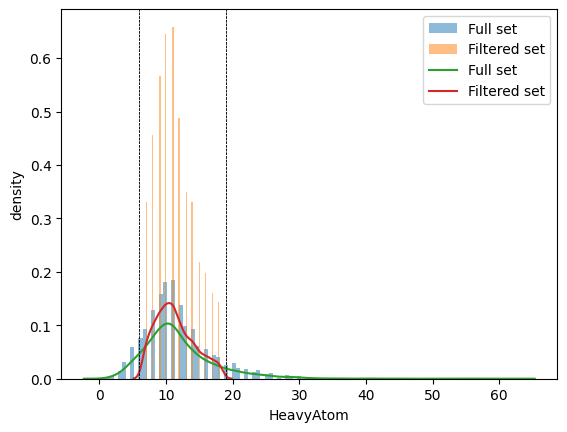

In [45]:
# make plots that shows the filtering

plt.hist(heavyatom_values,bins=100,label="Full set",density=True, alpha=0.5)
plt.hist(values_filtered,bins=50,label="Filtered set",density=True, alpha=0.5)
plt.xlabel("Molwt")
plt.ylabel("frequency")
# This is to plot vertical lines for the boundary at 10% and 90%
# using axvline. Here we will need to use the plt.gca() to get the
# axis object for the plot
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
#plt.show()
plt.legend()

# note that the KDE plot will "leak" outside the boundry
# lines as the KDE employs finite width Gaussian kernels
sns.kdeplot(heavyatom_values,label="Full set")
sns.kdeplot(values_filtered,label="Filtered set")
plt.xlabel("HeavyAtom")
plt.ylabel("density")
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.legend()
#plt.show()

Heavy Atoms → R² train: 0.127, R² test: 0.114


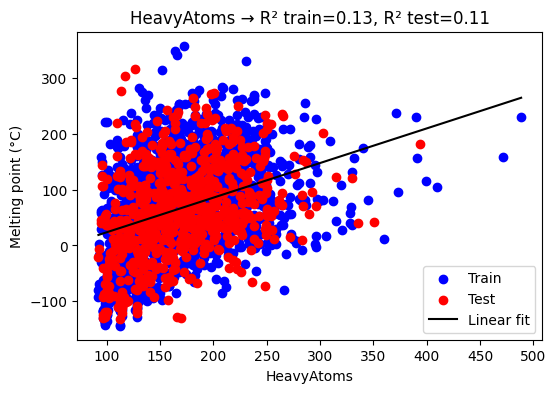

In [46]:
# Linear regression
X = data_heavyatoms_filtered[['MolWt']].values
y = data_heavyatoms_filtered['mpC'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print(f"Heavy Atoms → R² train: {r2_train:.3f}, R² test: {r2_test:.3f}")

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(X_line, model.predict(X_line), color='black', label='Linear fit')
plt.xlabel('HeavyAtoms')
plt.ylabel('Melting point (°C)')
plt.title(f'HeavyAtoms → R² train={r2_train:.2f}, R² test={r2_test:.2f}')
plt.legend()
plt.show ()

HBA

0.0
4.0
values.size: 3025
values_filtered.size 2059
values_filtered_out 966


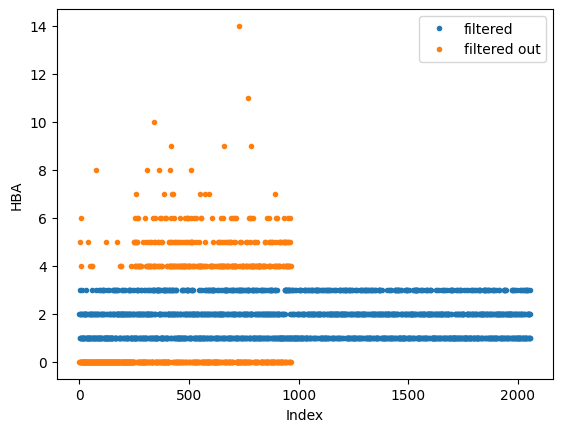

In [47]:
hba_values = data_clean["HBA"].values
values_percentile_10 = np.percentile(hba_values,10)
values_percentile_90 = np.percentile(hba_values,90)

print(values_percentile_10)
print(values_percentile_90)

mask_10_to_90 = (hba_values > values_percentile_10) & (hba_values < values_percentile_90)

values_filtered = hba_values[mask_10_to_90]
# the "~" is a boolean NOT operator
values_filtered_out = hba_values[~mask_10_to_90]
#For regression (molwt + mpC together)
data_hba_filtered = data_clean[mask_10_to_90]

print("values.size:",hba_values.size)
print("values_filtered.size",values_filtered.size)
print("values_filtered_out",values_filtered_out.size)

plt.plot(values_filtered,'.',label="filtered")
plt.plot(values_filtered_out,'.',label="filtered out")
plt.xlabel("Index")
plt.ylabel("HBA")
plt.legend()

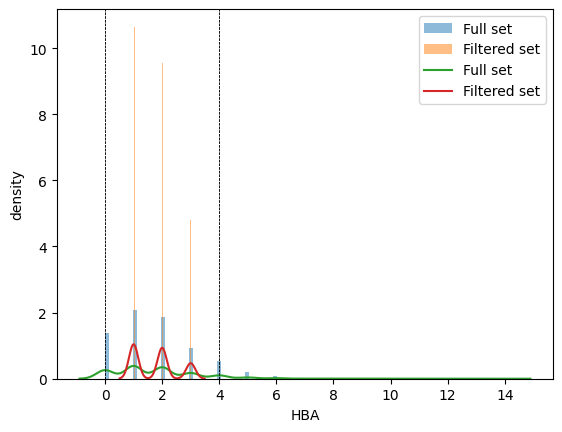

In [48]:
# make plots that shows the filtering

plt.hist(hba_values,bins=100,label="Full set",density=True, alpha=0.5)
plt.hist(values_filtered,bins=50,label="Filtered set",density=True, alpha=0.5)
plt.xlabel("HBA")
plt.ylabel("frequency")
# This is to plot vertical lines for the boundary at 10% and 90%
# using axvline. Here we will need to use the plt.gca() to get the
# axis object for the plot
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
#plt.show()
plt.legend()

# note that the KDE plot will "leak" outside the boundry
# lines as the KDE employs finite width Gaussian kernels
sns.kdeplot(hba_values,label="Full set")
sns.kdeplot(values_filtered,label="Filtered set")
plt.xlabel("HBA")
plt.ylabel("density")
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.legend()
#plt.show()

HBA → R² train: 0.091, R² test: 0.093


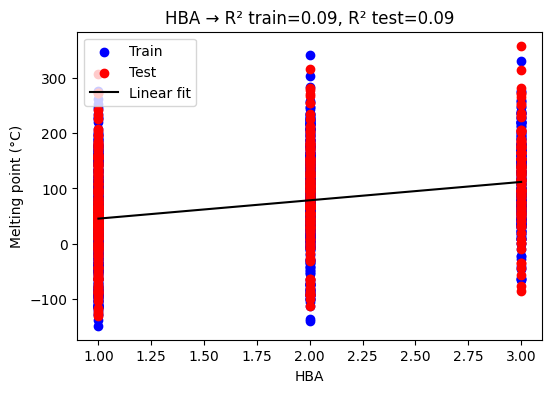

In [49]:
# Linear regression
X = data_hba_filtered[['HBA']].values
y = data_hba_filtered['mpC'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print(f"HBA → R² train: {r2_train:.3f}, R² test: {r2_test:.3f}")

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(X_line, model.predict(X_line), color='black', label='Linear fit')
plt.xlabel('HBA')
plt.ylabel('Melting point (°C)')
plt.title(f'HBA → R² train={r2_train:.2f}, R² test={r2_test:.2f}')
plt.legend()
plt.show()

HBD

0.0
2.0
values.size: 3025
values_filtered.size 985
values_filtered_out 2040


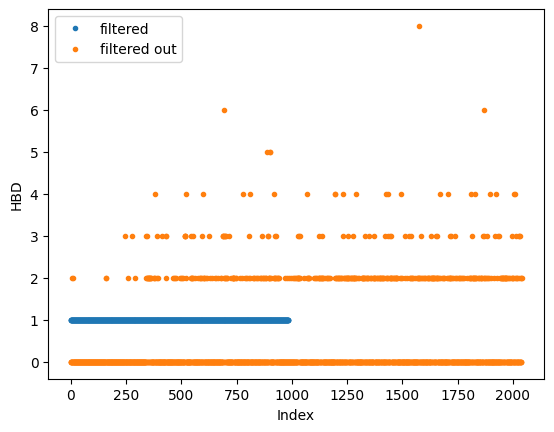

In [50]:
hbd_values = data_clean["HBD"].values
values_percentile_10 = np.percentile(hbd_values,10)
values_percentile_90 = np.percentile(hbd_values,90)

print(values_percentile_10)
print(values_percentile_90)

mask_10_to_90 = (hbd_values > values_percentile_10) & (hbd_values < values_percentile_90)

values_filtered = hbd_values[mask_10_to_90]
# the "~" is a boolean NOT operator
values_filtered_out = hbd_values[~mask_10_to_90]

#For regression (molwt + mpC together)
data_hbd_filtered = data_clean[mask_10_to_90]

print("values.size:",hbd_values.size)
print("values_filtered.size",values_filtered.size)
print("values_filtered_out",values_filtered_out.size)

plt.plot(values_filtered,'.',label="filtered")
plt.plot(values_filtered_out,'.',label="filtered out")
plt.xlabel("Index")
plt.ylabel("HBD")
plt.legend()



/tmp/ipython-input-2645863432.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(values_filtered,label="Filtered set")


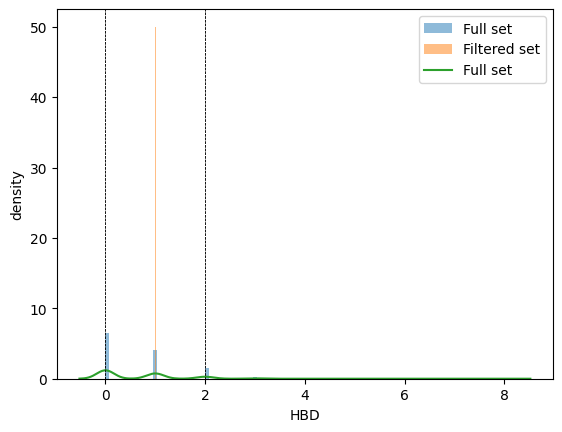

In [51]:
# make plots that shows the filtering

plt.hist(hbd_values,bins=100,label="Full set",density=True, alpha=0.5)
plt.hist(values_filtered,bins=50,label="Filtered set",density=True, alpha=0.5)
plt.xlabel("HBD")
plt.ylabel("frequency")
# This is to plot vertical lines for the boundary at 10% and 90%
# using axvline. Here we will need to use the plt.gca() to get the
# axis object for the plot
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
#plt.show()
plt.legend()

# note that the KDE plot will "leak" outside the boundry
# lines as the KDE employs finite width Gaussian kernels
sns.kdeplot(hbd_values,label="Full set")
sns.kdeplot(values_filtered,label="Filtered set")
plt.xlabel("HBD")
plt.ylabel("density")
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.legend()
#plt.show()

HBD → R² train: 0.000, R² test: -0.002


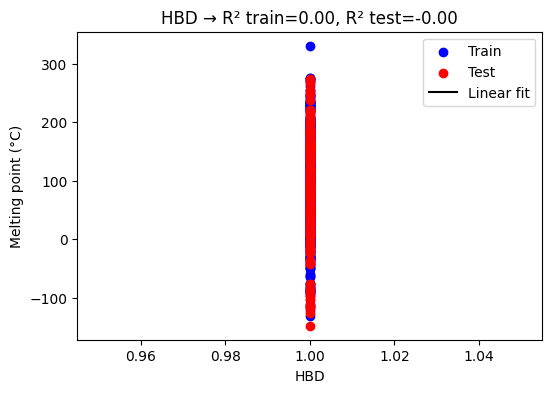

In [52]:
# Linear regression
X = data_hbd_filtered[['HBD']].values
y = data_hbd_filtered['mpC'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print(f"HBD → R² train: {r2_train:.3f}, R² test: {r2_test:.3f}")

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(X_line, model.predict(X_line), color='black', label='Linear fit')
plt.xlabel('HBD')
plt.ylabel('Melting point (°C)')
plt.title(f'HBD → R² train={r2_train:.2f}, R² test={r2_test:.2f}')
plt.legend()

LogP

0.4642799999999999
4.002900000000003
values.size: 3025
values_filtered.size 2418
values_filtered_out 607


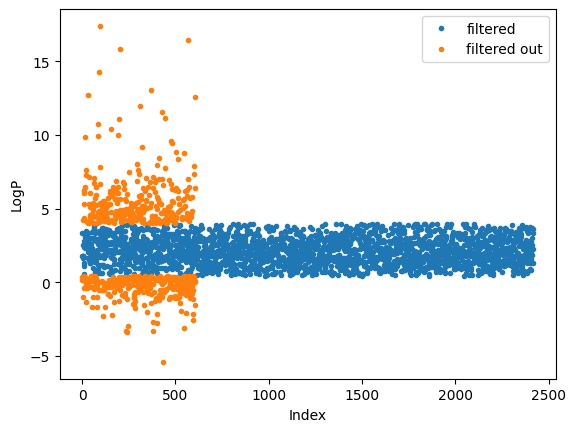

In [53]:
logp_values = data_clean["LogP"].values
values_percentile_10 = np.percentile(logp_values,10)
values_percentile_90 = np.percentile(logp_values,90)

print(values_percentile_10)
print(values_percentile_90)

mask_10_to_90 = (logp_values > values_percentile_10) & (logp_values < values_percentile_90)

values_filtered = logp_values[mask_10_to_90]
# the "~" is a boolean NOT operator
values_filtered_out = logp_values[~mask_10_to_90]

#For regression (molwt + mpC together)
data_logP_filtered = data_clean[mask_10_to_90]

print("values.size:",logp_values.size)
print("values_filtered.size",values_filtered.size)
print("values_filtered_out",values_filtered_out.size)

plt.plot(values_filtered,'.',label="filtered")
plt.plot(values_filtered_out,'.',label="filtered out")
plt.xlabel("Index")
plt.ylabel("LogP")
plt.legend()

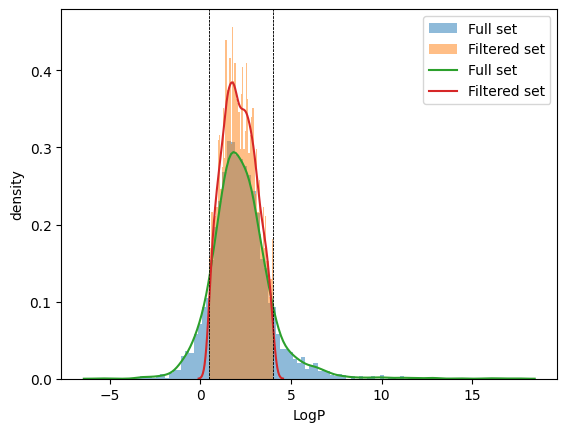

In [54]:
# make plots that shows the filtering

plt.hist(logp_values,bins=100,label="Full set",density=True, alpha=0.5)
plt.hist(values_filtered,bins=50,label="Filtered set",density=True, alpha=0.5)
plt.xlabel("LogP")
plt.ylabel("frequency")
# This is to plot vertical lines for the boundary at 10% and 90%
# using axvline. Here we will need to use the plt.gca() to get the
# axis object for the plot
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
#plt.show()
plt.legend()

# note that the KDE plot will "leak" outside the boundry
# lines as the KDE employs finite width Gaussian kernels
sns.kdeplot(logp_values,label="Full set")
sns.kdeplot(values_filtered,label="Filtered set")
plt.xlabel("LogP")
plt.ylabel("density")
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.legend()
#plt.show()

LogP → R² train: 0.004, R² test: -0.006


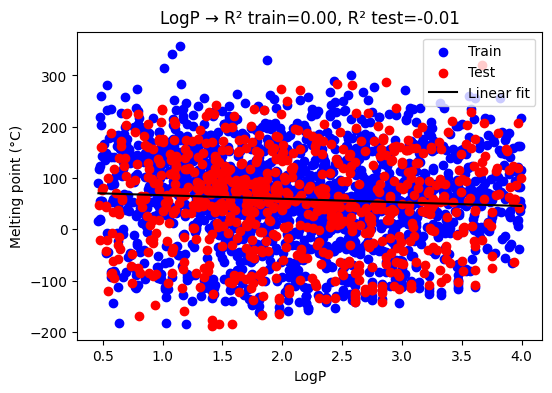

In [55]:
# Linear regression
X = data_logP_filtered[['LogP']].values
y = data_logP_filtered['mpC'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print(f"LogP → R² train: {r2_train:.3f}, R² test: {r2_test:.3f}")

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(X_line, model.predict(X_line), color='black', label='Linear fit')
plt.xlabel('LogP')
plt.ylabel('Melting point (°C)')
plt.title(f'LogP → R² train={r2_train:.2f}, R² test={r2_test:.2f}')
plt.legend()

TPSA

0.0
70.76599999999999
values.size: 3025
values_filtered.size 2085
values_filtered_out 940


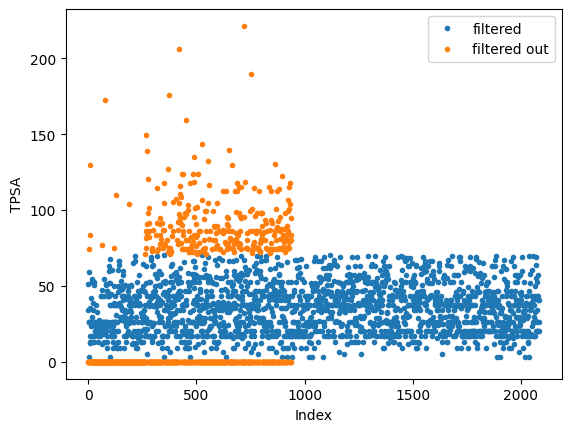

In [56]:
tpsa_values = data_clean["TPSA"].values
values_percentile_10 = np.percentile(tpsa_values,10)
values_percentile_90 = np.percentile(tpsa_values,90)

print(values_percentile_10)
print(values_percentile_90)

mask_10_to_90 = (tpsa_values > values_percentile_10) & (tpsa_values < values_percentile_90)

values_filtered = tpsa_values[mask_10_to_90]
# the "~" is a boolean NOT operator
values_filtered_out = tpsa_values[~mask_10_to_90]

#For regression (molwt + mpC together)
data_tpsa_filtered = data_clean[mask_10_to_90]

print("values.size:",tpsa_values.size)
print("values_filtered.size",values_filtered.size)
print("values_filtered_out",values_filtered_out.size)

plt.plot(values_filtered,'.',label="filtered")
plt.plot(values_filtered_out,'.',label="filtered out")
plt.xlabel("Index")
plt.ylabel("TPSA")
plt.legend()

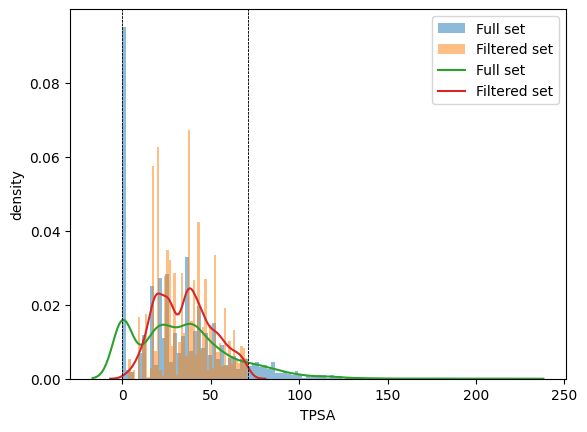

In [57]:
# make plots that shows the filtering

plt.hist(tpsa_values,bins=100,label="Full set",density=True, alpha=0.5)
plt.hist(values_filtered,bins=50,label="Filtered set",density=True, alpha=0.5)
plt.xlabel("TPSA")
plt.ylabel("frequency")
# This is to plot vertical lines for the boundary at 10% and 90%
# using axvline. Here we will need to use the plt.gca() to get the
# axis object for the plot
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
#plt.show()
plt.legend()

# note that the KDE plot will "leak" outside the boundry
# lines as the KDE employs finite width Gaussian kernels
sns.kdeplot(tpsa_values,label="Full set")
sns.kdeplot(values_filtered,label="Filtered set")
plt.xlabel("TPSA")
plt.ylabel("density")
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.legend()

TPSA → R² train: 0.191, R² test: 0.230


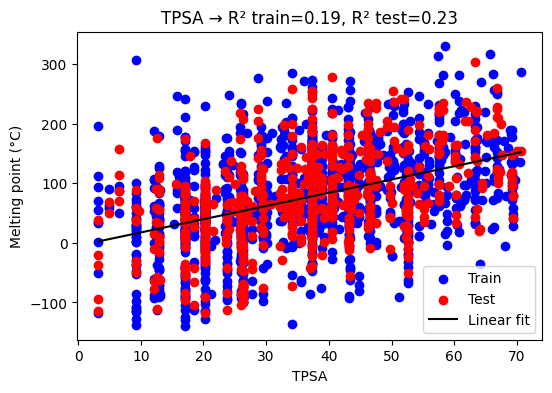

In [58]:
# Linear regression
X = data_tpsa_filtered[['TPSA']].values
y = data_tpsa_filtered['mpC'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print(f"TPSA → R² train: {r2_train:.3f}, R² test: {r2_test:.3f}")

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(X_line, model.predict(X_line), color='black', label='Linear fit')
plt.xlabel('TPSA')
plt.ylabel('Melting point (°C)')
plt.title(f'TPSA → R² train={r2_train:.2f}, R² test={r2_test:.2f}')
plt.legend()

TPSA-SP

0.0
74.60000000000001
values.size: 3025
values_filtered.size 2144
values_filtered_out 881


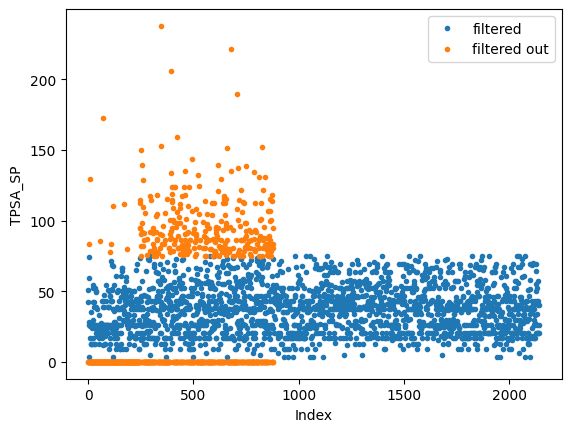

In [59]:
tpsa_sp_values = data_clean["TPSA_S_P"].values
values_percentile_10 = np.percentile(tpsa_sp_values,10)
values_percentile_90 = np.percentile(tpsa_sp_values,90)

print(values_percentile_10)
print(values_percentile_90)

mask_10_to_90 = (tpsa_sp_values > values_percentile_10) & (tpsa_sp_values < values_percentile_90)

values_filtered = tpsa_sp_values[mask_10_to_90]
# the "~" is a boolean NOT operator
values_filtered_out = tpsa_sp_values[~mask_10_to_90]

#For regression (molwt + mpC together)
data_tpsa_sp_filtered = data_clean[mask_10_to_90]

print("values.size:",tpsa_sp_values.size)
print("values_filtered.size",values_filtered.size)
print("values_filtered_out",values_filtered_out.size)

plt.plot(values_filtered,'.',label="filtered")
plt.plot(values_filtered_out,'.',label="filtered out")
plt.xlabel("Index")
plt.ylabel("TPSA_SP")
plt.legend()

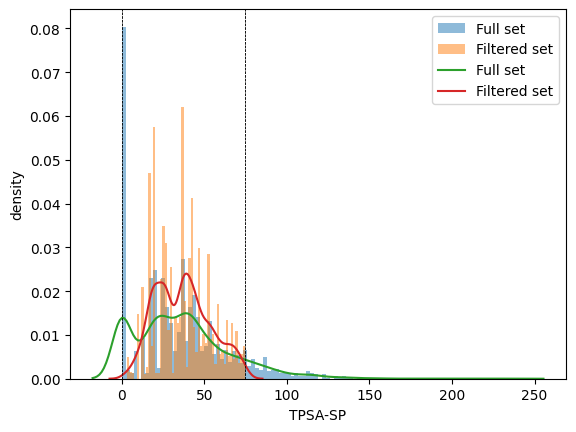

In [60]:
# make plots that shows the filtering

plt.hist(tpsa_sp_values,bins=100,label="Full set",density=True, alpha=0.5)
plt.hist(values_filtered,bins=50,label="Filtered set",density=True, alpha=0.5)
plt.xlabel("TPSA-SP")
plt.ylabel("frequency")
# This is to plot vertical lines for the boundary at 10% and 90%
# using axvline. Here we will need to use the plt.gca() to get the
# axis object for the plot
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
#plt.show()
plt.legend()

# note that the KDE plot will "leak" outside the boundry
# lines as the KDE employs finite width Gaussian kernels
sns.kdeplot(tpsa_sp_values,label="Full set")
sns.kdeplot(values_filtered,label="Filtered set")
plt.xlabel("TPSA-SP")
plt.ylabel("density")
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.legend()

TPSA_SP → R² train: 0.215, R² test: 0.162


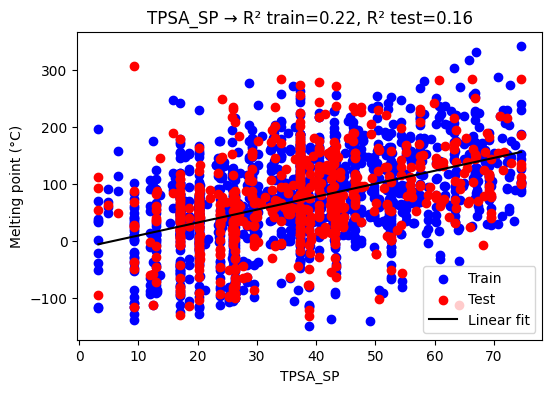

In [61]:
# Linear regression
X = data_tpsa_sp_filtered[['TPSA_S_P']].values
y = data_tpsa_sp_filtered['mpC'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print(f"TPSA_SP → R² train: {r2_train:.3f}, R² test: {r2_test:.3f}")

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(X_line, model.predict(X_line), color='black', label='Linear fit')
plt.xlabel('TPSA_SP')
plt.ylabel('Melting point (°C)')
plt.title(f'TPSA_SP → R² train={r2_train:.2f}, R² test={r2_test:.2f}')
plt.legend()

E) Performing RANSAC regression for molweight and TPSA .
These two properties correlate best with the melting point.

In [62]:
import numpy as np
from sklearn.linear_model import LinearRegression, RANSACRegressor
import numpy as np
import matplotlib.pyplot as plt

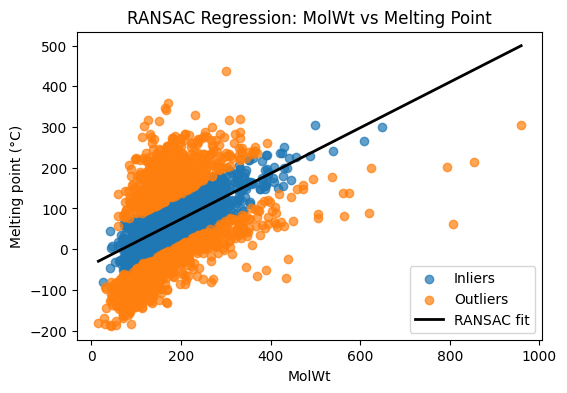

In [63]:
# X and y from  dataframe
X = data_clean[['MolWt']].values   # all data, no filtering
y = data_clean['mpC'].values

# RANSAC regression
ransac = RANSACRegressor(
    estimator=LinearRegression(),
    min_samples=0.5,
    random_state=42
)

ransac.fit(X, y)

# Identify inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask

# Plot
plt.figure(figsize=(6,4))

plt.scatter(X[inlier_mask], y[inlier_mask],
            label='Inliers', alpha=0.7)

plt.scatter(X[outlier_mask], y[outlier_mask],
            label='Outliers', alpha=0.7)

X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(X_line, ransac.predict(X_line),
         color='black', linewidth=2, label='RANSAC fit')

plt.xlabel('MolWt')
plt.ylabel('Melting point (°C)')
plt.title('RANSAC Regression: MolWt vs Melting Point')
plt.legend()
plt.show()


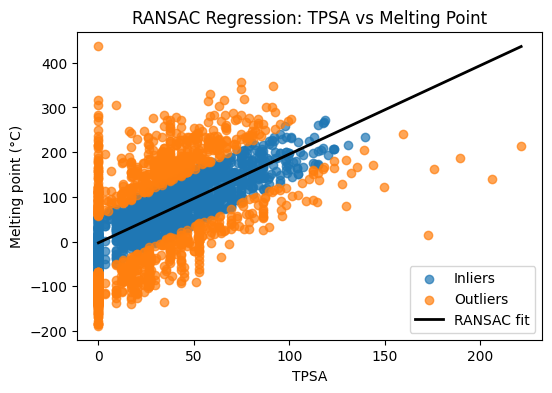

In [64]:


# X and y from  dataframe
X = data_clean[['TPSA']].values   # all data, no filtering
y = data_clean['mpC'].values

# RANSAC regression
ransac = RANSACRegressor(
    estimator=LinearRegression(),
    min_samples=0.5,
    random_state=42
)

ransac.fit(X, y)

# Identify inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask

# Plot
plt.figure(figsize=(6,4))

plt.scatter(X[inlier_mask], y[inlier_mask],
            label='Inliers', alpha=0.7)

plt.scatter(X[outlier_mask], y[outlier_mask],
            label='Outliers', alpha=0.7)

X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
plt.plot(X_line, ransac.predict(X_line),
         color='black', linewidth=2, label='RANSAC fit')

plt.xlabel('TPSA')
plt.ylabel('Melting point (°C)')
plt.title('RANSAC Regression: TPSA vs Melting Point')
plt.legend()
plt.show()


### Task 2 - Optional 5 points

Here we will consider a dataset of two variables $x$ and $y$ sampled from a two-dimensional probability density $P(x,y)$ that is unknown.

The dataset is given as a time series in the file `Dataset_RotatedWQ-Potential.data`.

The main task is to perform a Gaussian Mixture Model analysis on this two-dimensional dataset.

#### A)
Plot the dataset, both the time series and also a scatter plot for the $x$ and $y$ variables.

Looking at the scatter plot, how many Gaussian components do you think are needed in the Gaussian Mixture Model analysis?

#### B)
Using Seaborn (or scikit-learn) estimate the two-dimensional probability density $P(x,y)$ using kernel density estimation.

#### C)
Perform a Gaussian Mixture Model analysis for a different number of components, and obtain the Bayesian information criterion (bic) and Akaike information criterion (aic) values and based on them identify the optimal number of components (remember that for both a lower value is better).

#### D)
For the optimal number of components, perform a final Gaussian Mixture Model analysis that you will analyze.

- What is the weight of each Gaussian components.

- What is the percentage of samples that are hard classifed to each cluster.

- Make a scatter plot that shows how the samples are hard classifed to each cluster. In this plot, indicate the center of each Gaussian components.

- Make figures that shows how the samples are soft classifed to each cluster (e.g., the probablity that they belong to a given cluster). In each plot, indicate the center of corresponding Gaussian components.

- Plot a two-dimensional surface of the $P(x,y)$ estimated by the Gaussian Mixture Model. How does this compare to the KDE plot from B)?


In [65]:
# Bash script to download all the dataset. Don't worry if you don't understand it
%%bash

url="https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Assignment-2/"
dataset_filename="Dataset_RotatedWQ-Potential.data"

rm -f ${dataset_filename}

wget ${url}/${dataset_filename} &> /dev/null

ls



BradleyDoublePlusGoodMeltingPointDataset.csv
Dataset_RotatedWQ-Potential.data
sample_data
test-subset.csv
test_with_descriptors.csv


A) Load data + time series + scatter plot

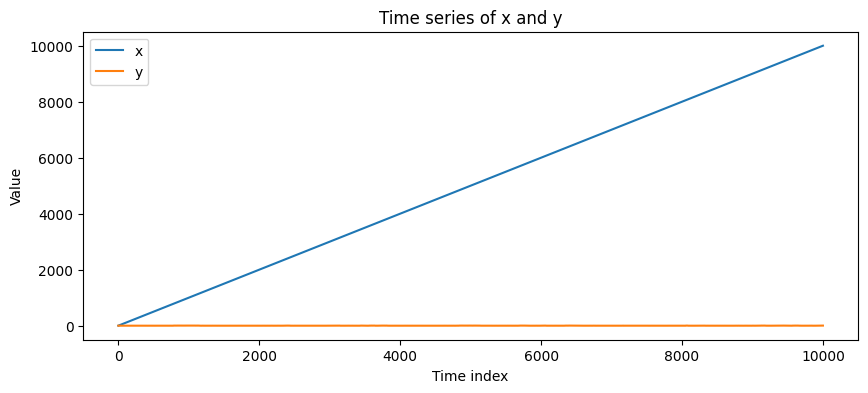

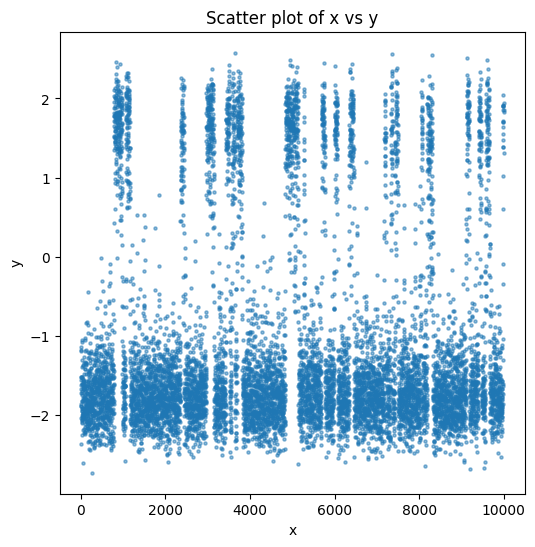

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
# If comma-separated, change delimiter=','
data = np.loadtxt("Dataset_RotatedWQ-Potential.data")

x = data[:, 0]
y = data[:, 1]

# Time series plot
plt.figure(figsize=(10,4))
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.xlabel("Time index")
plt.ylabel("Value")
plt.title("Time series of x and y")
plt.legend()
plt.show()

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of x vs y")
plt.show()


B) 2D KDE estimate of P(x,y)

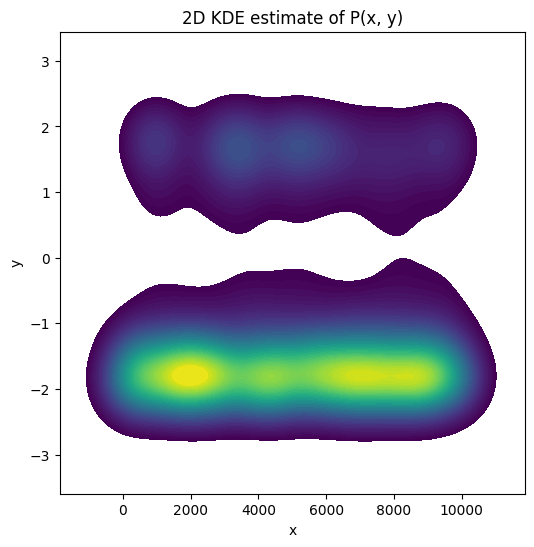

In [67]:
plt.figure(figsize=(6,6))
sns.kdeplot(
    x=x, y=y,
    fill=True,
    cmap="viridis",
    levels=50
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D KDE estimate of P(x, y)")
plt.show()


C) GMM with different components + BIC/AIC

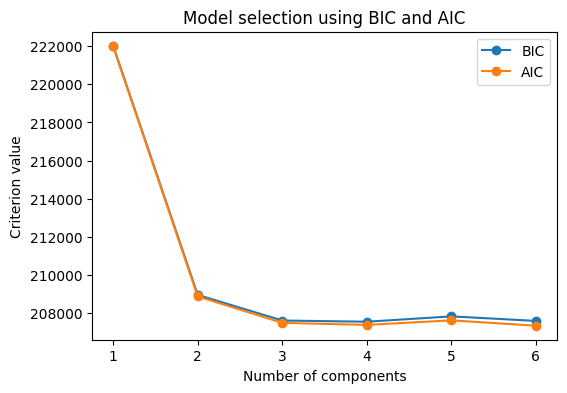

In [68]:
from sklearn.mixture import GaussianMixture

X = np.column_stack((x, y))

n_components_range = range(1, 7)
bic = []
aic = []

for n in n_components_range:
    gmm = GaussianMixture(
        n_components=n,
        covariance_type='full',
        random_state=42
    )
    gmm.fit(X)
    bic.append(gmm.bic(X))
    aic.append(gmm.aic(X))

# Plot BIC/AIC
plt.figure(figsize=(6,4))
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.plot(n_components_range, aic, marker='o', label='AIC')
plt.xlabel("Number of components")
plt.ylabel("Criterion value")
plt.title("Model selection using BIC and AIC")
plt.legend()
plt.show()


In [69]:
N_OPT = 3

gmm = GaussianMixture(
    n_components=N_OPT,
    covariance_type='full',
    random_state=42
)
gmm.fit(X)

labels = gmm.predict(X)
probs = gmm.predict_proba(X)
means = gmm.means_
weights = gmm.weights_


D1) Weight of each Gaussian component

In [70]:
for i, w in enumerate(weights):
    print(f"Component {i}: weight = {w:.3f}")


Component 0: weight = 0.220
Component 1: weight = 0.325
Component 2: weight = 0.455


D2) Percentage of samples hard-classified to each cluster

In [71]:
for i in range(N_OPT):
    perc = np.mean(labels == i) * 100
    print(f"Component {i}: {perc:.2f}% of samples")


Component 0: 21.68% of samples
Component 1: 33.56% of samples
Component 2: 44.77% of samples


D3) Scatter plot — hard classification + centers

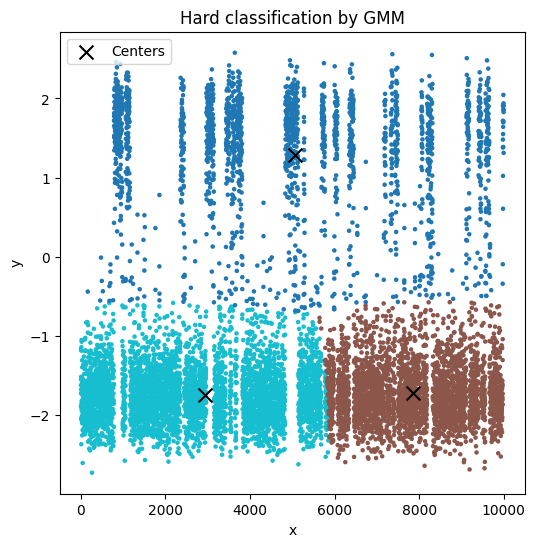

In [72]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, c=labels, cmap='tab10', s=5)
plt.scatter(means[:,0], means[:,1],
            c='black', marker='x', s=100, label='Centers')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hard classification by GMM")
plt.legend()
plt.show()


D4) Soft classification plots (probabilities)

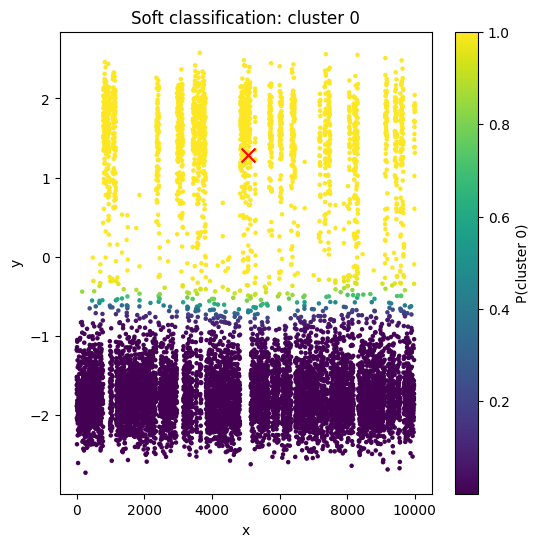

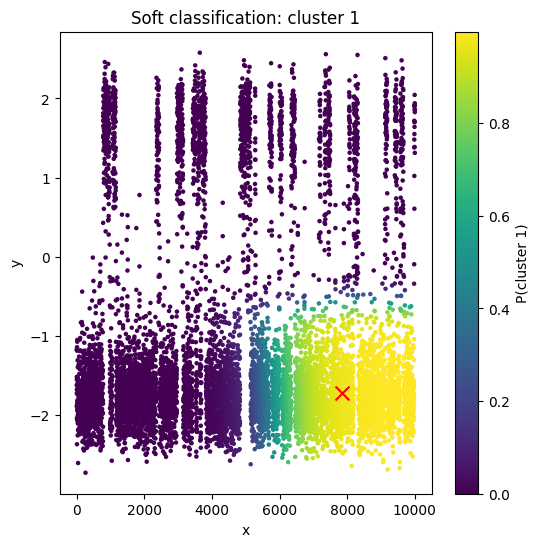

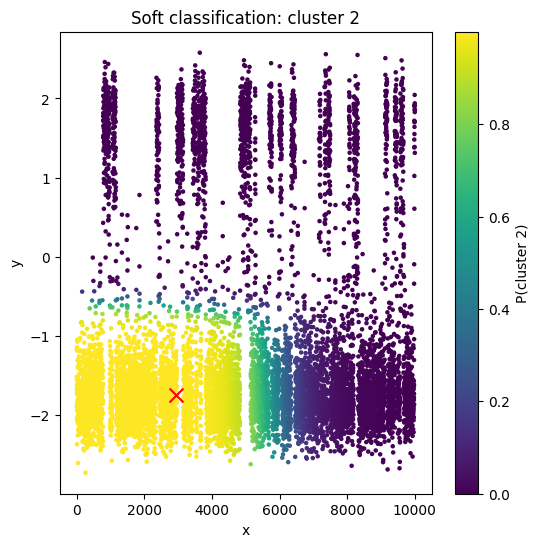

In [73]:
for i in range(N_OPT):
    plt.figure(figsize=(6,6))
    plt.scatter(x, y, c=probs[:, i], cmap='viridis', s=5)
    plt.colorbar(label=f"P(cluster {i})")
    plt.scatter(means[i,0], means[i,1],
                c='red', marker='x', s=100)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Soft classification: cluster {i}")
    plt.show()


D5) 2D surface of
𝑃
(
𝑥
,
𝑦
)
P(x,y) from GMM

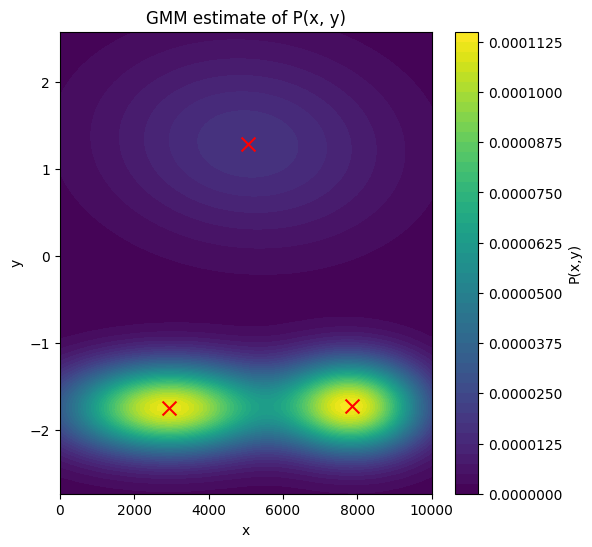

In [74]:
# Grid
x_grid = np.linspace(x.min(), x.max(), 100)
y_grid = np.linspace(y.min(), y.max(), 100)
Xg, Yg = np.meshgrid(x_grid, y_grid)
XY = np.column_stack([Xg.ravel(), Yg.ravel()])

Z = np.exp(gmm.score_samples(XY))
Z = Z.reshape(Xg.shape)

# Surface / contour plot
plt.figure(figsize=(6,6))
plt.contourf(Xg, Yg, Z, levels=50, cmap='viridis')
plt.colorbar(label='P(x,y)')
plt.scatter(means[:,0], means[:,1],
            c='red', marker='x', s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("GMM estimate of P(x, y)")
plt.show()
